In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
# grafik secara inline

In [ ]:
# Loading dan review data
df = pd.read_csv("./diabetes.csv")
df.shape # baris n kolom data
df.head(5) # ambil 5 data awal
df.tail(5) # ambil 5 data akhir

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.isnull().values.any()

False

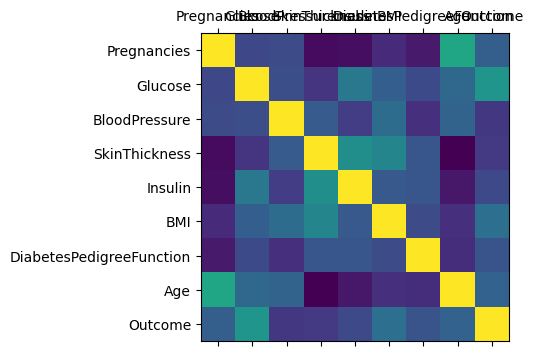

In [ ]:
def plot_corr(df, size=4):
  corr = df.corr()
  fig, ax = plt.subplots(figsize=(size, size))
  ax.matshow(corr)
  plt.xticks(range(len(corr.columns)), corr.columns)
  plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(df) # mencari korelasi antar var
# cuma bandingin dataset yg bentuknya angka

In [ ]:
del df('nama kolom') # hapus nama kolom yg kolerasinya banyak

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
# ubah nilai
diabetes_map = {True: 1, False: 0}
df['nama kolom'] = df['nama kolom'].map(diabetes_map)

In [ ]:
# cek distribusi
num_obs = len(df)
num_true = len(df.loc[df['Outcome'] == 1])
num_false = len(df.loc[df['Outcome'] == 0])
print("jumlah terkena diabetes", num_true, num_true/num_obs * 100)
print("jumlah tidak terkena diabetes", num_false, num_false/num_obs * 100)

jumlah terkena diabetes 268 34.89583333333333
jumlah tidak terkena diabetes 500 65.10416666666666


In [ ]:
from sklearn.model_selection import train_test_split
feature_col_names = ['Pregnancies',	'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']
predicted_class_names = ['Outcome']

x = df[feature_col_names].values
y = df[predicted_class_names].values
split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42)


In [ ]:
print("ada pada training set ", (len(x_train)/len(df.index)) * 100)
print("ada pada test set ", (len(x_test)/len(df.index)) * 100)

ada pada training set  69.921875
ada pada test set  30.078125


In [ ]:
# apakah predicted value udh kesplit dengan benar
print("kena diabet ", len(df.loc[df['Outcome'] == 1]), (len(df.loc[df['Outcome'] == 1])/len(df.index)) * 100)
print("ga kena diabet ", len(df.loc[df['Outcome'] == 0]), (len(df.loc[df['Outcome'] == 0])/len(df.index)) * 100)

kena diabet  268 34.89583333333333
ga kena diabet  500 65.10416666666666


In [ ]:
# true n false jg harus 70 30
print("train true ", len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100)
print("train false ", len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100)
print("test true ", len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100)
print("test false ", len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100)

train true  188 35.00931098696462
train false  349 64.99068901303538
test true  80 34.63203463203463
test false  151 65.36796536796537


In [ ]:
# ngeliat missing row
# Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age
print("row yg missing di Pregnancies ", len(df.loc[df['Pregnancies'] == 0]))
print("row yg missing di Glucose ", len(df.loc[df['Glucose'] == 0]))
print("row yg missing di BloodPressure ", len(df.loc[df['BloodPressure'] == 0]))
print("row yg missing di SkinThickness ", len(df.loc[df['SkinThickness'] == 0]))
print("row yg missing di Insulin ", len(df.loc[df['Insulin'] == 0]))
print("row yg missing di BMI ", len(df.loc[df['BMI'] == 0]))
print("row yg missing di DiabetesPedigreeFunction ", len(df.loc[df['DiabetesPedigreeFunction'] == 0]))
print("row yg missing di Age ", len(df.loc[df['Age'] == 0]))

row yg missing di Pregnancies  111
row yg missing di Glucose  5
row yg missing di BloodPressure  35
row yg missing di SkinThickness  227
row yg missing di Insulin  374
row yg missing di BMI  11
row yg missing di DiabetesPedigreeFunction  0
row yg missing di Age  0


In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# ngefill 0 di insulin
from sklearn.impute import SimpleImputer
fill_0 = SimpleImputer(missing_values=0, strategy="mean")
x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

In [ ]:
# bikin naive bayes model
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train, y_train.ravel())

GaussianNB()

In [ ]:
# uji akurasi model
nb_predict_train = nb_model.predict(x_train)
from sklearn import metrics

print("akurasi ", metrics.accuracy_score(y_train, nb_predict_train))




akurasi  0.7541899441340782


In [ ]:
nb_predict_test = nb_model.predict(x_test)
print("nb_predict_test ", nb_predict_test)
print("y_test ", y_test)
print("akurasi ", metrics.accuracy_score(y_test, nb_predict_test))


nb_predict_test  [0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 0]
y_test  [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]


In [ ]:
# confusion matrix
# ada 0 yg sebenernya 1 dan sebaliknya
# true negative: bener2 0
# false positive: 1 tp harusnya 0
# false negative
# true positive
print(metrics.confusion_matrix(y_test, nb_predict_test))
# classification report
print(metrics.classification_report(y_test, nb_predict_test))

[[118  33]
 [ 28  52]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



In [ ]:
# random forest classifier
# 2
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_estimators=10)
rf_model.fit(x_train, y_train.ravel())

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
rf_predict_train = rf_model.predict(x_train)
print("akurasi ", metrics.accuracy_score(y_train, rf_predict_train))

akurasi  0.9869646182495344


In [ ]:
rf_predict_test = rf_model.predict(x_test)
print("akurasi ", metrics.accuracy_score(y_test, rf_predict_test))

akurasi  0.70995670995671


In [ ]:
print(metrics.confusion_matrix(y_test, rf_predict_test))
print(metrics.classification_report(y_test, rf_predict_test))

[[121  30]
 [ 37  43]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       151
           1       0.59      0.54      0.56        80

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.71       231



In [ ]:
from sklearn.linear_model import LogisticRegression
# 3
lr_model = LogisticRegression(C=0.7, random_state=42, solver='liblinear', max_iter=10000)
lr_model.fit(x_train, y_train.ravel())
lr_predict_test = lr_model.predict(x_test)

print("akurasi ", metrics.accuracy_score(y_test, lr_predict_test))
print(metrics.confusion_matrix(y_test, lr_predict_test))
print(metrics.classification_report(y_test, lr_predict_test))
# recall masih dikit

akurasi  0.7445887445887446
[[128  23]
 [ 36  44]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       151
           1       0.66      0.55      0.60        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



In [ ]:
# ubah parameter, bikin algo lain agar recall lebih besar
# krn jml yg diabet sm yg ga diabet ga balance

c_start = 0.1
c_end = 5
c_inc = 0.1

c_values, recall_scores = [], []
c_val = c_start

best_recall_score = 0

while(c_val < c_end):
  c_values.append(c_val)
  lr_model_loop = LogisticRegression(C=c_val, class_weight="balanced", random_state=42, solver='liblinear', max_iter=10000)
  lr_model_loop.fit(x_train, y_train.ravel())
  lr_predict_loop_test = lr_model_loop.predict(x_test)
  recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
  recall_scores.append(recall_score)
  if(recall_score > best_recall_score):
    best_recall_score = recall_score
    best_lr_predict_test = lr_predict_loop_test
  c_val = c_val + c_inc


first max value of  0.7375  occured at c =  0.30000000000000004


Text(0, 0.5, 'recall score')

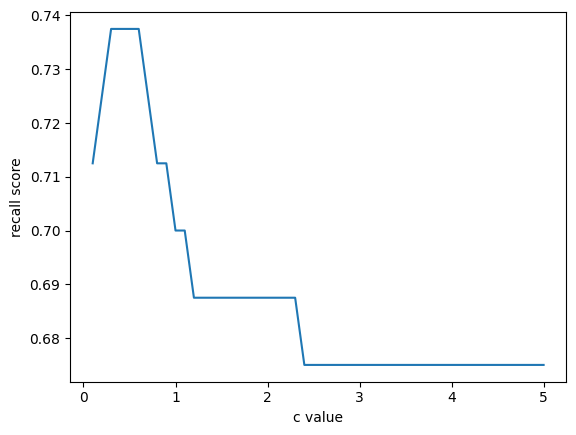

In [ ]:
best_score_c_val = c_values[recall_scores.index(best_recall_score)]
print("first max value of ", best_recall_score, " occured at c = ", best_score_c_val)
plt.plot(c_values, recall_scores, "-")
plt.xlabel("c value")
plt.ylabel("recall score")

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight="balanced", C=best_score_c_val, random_state=42, solver='liblinear')

lr_model.fit(x_train, y_train.ravel())
lr_predict_test = lr_model.predict(x_test)

print("akurasi ", metrics.accuracy_score(y_test, lr_predict_test))
print(metrics.confusion_matrix(y_test, lr_predict_test))
print(metrics.classification_report(y_test, lr_predict_test))
print(metrics.recall_score(y_test, lr_predict_test))

akurasi  0.7142857142857143
[[106  45]
 [ 21  59]]
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       151
           1       0.57      0.74      0.64        80

    accuracy                           0.71       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.74      0.71      0.72       231

0.7375


In [ ]:
# cross validation
# kalo data kecil, part data utk train n test bisa dipakai ulang
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced", max_iter=500)
lr_cv_model.fit(x_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, max_iter=500,
                     n_jobs=-1, random_state=42, refit=False)

In [ ]:
lr_cv_predict_test = lr_cv_model.predict(x_test)
print("accuracy ", metrics.accuracy_score(y_test, lr_cv_predict_test))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test))
print(metrics.classification_report(y_test, lr_cv_predict_test))

accuracy  0.7012987012987013
[[109  42]
 [ 27  53]]
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       151
           1       0.56      0.66      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.71       231



In [ ]:
import joblib
joblib.dump(lr_cv_model, "./kode-trained-model.pkl")

['./kode-trained-model.pkl']

In [ ]:
lr_cv_model = joblib.load("./kode-trained-model.pkl")